## **CART Decision Tree with No Pruning**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving banknote_auth_dataset.xlsx to banknote_auth_dataset (2).xlsx


In [ ]:
import io
dataset = pd.read_excel(io.BytesIO(uploaded['banknote_auth_dataset.xlsx']))

In [ ]:
dataset

,Variance,Skewness,Kurtosis,Entropy,Authenticity
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
X = dataset.drop('Authenticity', axis = 1)
Y = dataset['Authenticity']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [ ]:
predicted_df = pd.DataFrame({'Actual':Y_test, 'Predicted':Y_pred})
predicted_df

,Actual,Predicted
1023,1,1
642,0,0
1196,1,1
31,0,0
253,0,0
...,...,...
1342,1,1
251,0,0
1256,1,1
966,1,1


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

[[155   2]
 [  0 118]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       157
           1       0.98      1.00      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

0.9927272727272727


[Text(410.69216417910445, 509.625, 'X[0] <= 0.274\ngini = 0.495\nsamples = 1097\nvalue = [605, 492]'),
 Text(268.589552238806, 441.675, 'X[1] <= 7.565\ngini = 0.294\nsamples = 524\nvalue = [94, 430]'),
 Text(187.38805970149252, 373.725, 'X[0] <= -0.459\ngini = 0.123\nsamples = 441\nvalue = [29, 412]'),
 Text(99.94029850746269, 305.775, 'X[2] <= 6.746\ngini = 0.058\nsamples = 369\nvalue = [11, 358]'),
 Text(49.97014925373134, 237.825, 'X[1] <= 7.293\ngini = 0.007\nsamples = 266\nvalue = [1, 265]'),
 Text(24.98507462686567, 169.875, 'gini = 0.0\nsamples = 262\nvalue = [0, 262]'),
 Text(74.95522388059702, 169.875, 'X[3] <= -4.115\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(49.97014925373134, 101.92500000000001, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(99.94029850746269, 101.92500000000001, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(149.91044776119404, 237.825, 'X[1] <= -4.8\ngini = 0.175\nsamples = 103\nvalue = [10, 93]'),
 Text(124.92537313432835, 169.875, 'gini =

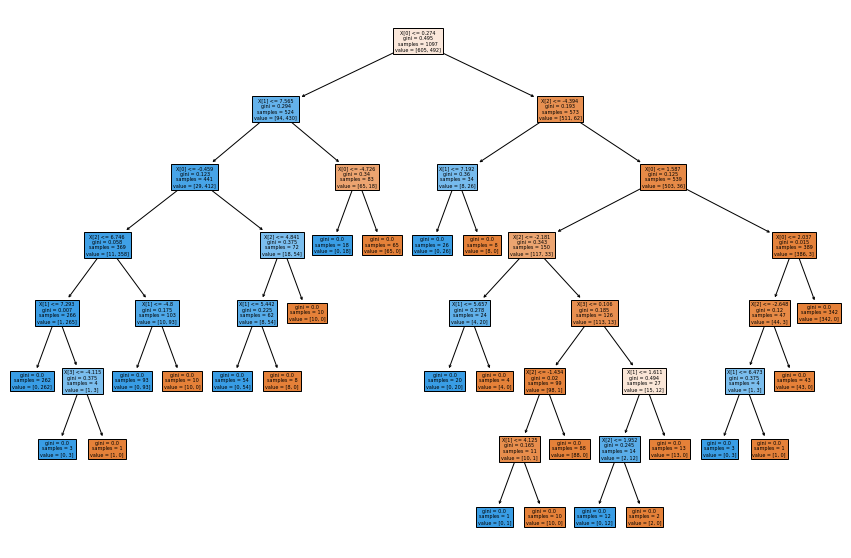

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier, filled=True)

##**Pruning the Decision Tree**

In [ ]:
classifier_prune = DecisionTreeClassifier(max_depth=4)  
classifier_prune.fit(X_train, Y_train)
Y_pred_prune = classifier_prune.predict(X_test)

In [ ]:
predicted_pruned_df = pd.DataFrame({'Actual':Y_test, 'Predicted':Y_pred_prune})
predicted_pruned_df

,Actual,Predicted
1023,1,1
642,0,0
1196,1,1
31,0,0
253,0,0
...,...,...
1342,1,1
251,0,0
1256,1,1
966,1,1


In [ ]:
print(confusion_matrix(Y_test, Y_pred_prune))
print(classification_report(Y_test, Y_pred_prune))
print(accuracy_score(Y_test, Y_pred_prune))

[[146  11]
 [  7 111]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       157
           1       0.91      0.94      0.93       118

    accuracy                           0.93       275
   macro avg       0.93      0.94      0.93       275
weighted avg       0.94      0.93      0.93       275

0.9345454545454546


[Text(418.5, 489.24, 'X[0] <= 0.274\ngini = 0.495\nsamples = 1097\nvalue = [605, 492]'),
 Text(247.29545454545456, 380.52000000000004, 'X[1] <= 7.565\ngini = 0.294\nsamples = 524\nvalue = [94, 430]'),
 Text(152.1818181818182, 271.8, 'X[0] <= -0.459\ngini = 0.123\nsamples = 441\nvalue = [29, 412]'),
 Text(76.0909090909091, 163.08000000000004, 'X[2] <= 6.746\ngini = 0.058\nsamples = 369\nvalue = [11, 358]'),
 Text(38.04545454545455, 54.360000000000014, 'gini = 0.007\nsamples = 266\nvalue = [1, 265]'),
 Text(114.13636363636364, 54.360000000000014, 'gini = 0.175\nsamples = 103\nvalue = [10, 93]'),
 Text(228.27272727272728, 163.08000000000004, 'X[2] <= 4.841\ngini = 0.375\nsamples = 72\nvalue = [18, 54]'),
 Text(190.22727272727275, 54.360000000000014, 'gini = 0.225\nsamples = 62\nvalue = [8, 54]'),
 Text(266.3181818181818, 54.360000000000014, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(342.40909090909093, 271.8, 'X[0] <= -4.726\ngini = 0.34\nsamples = 83\nvalue = [65, 18]'),
 Text(3

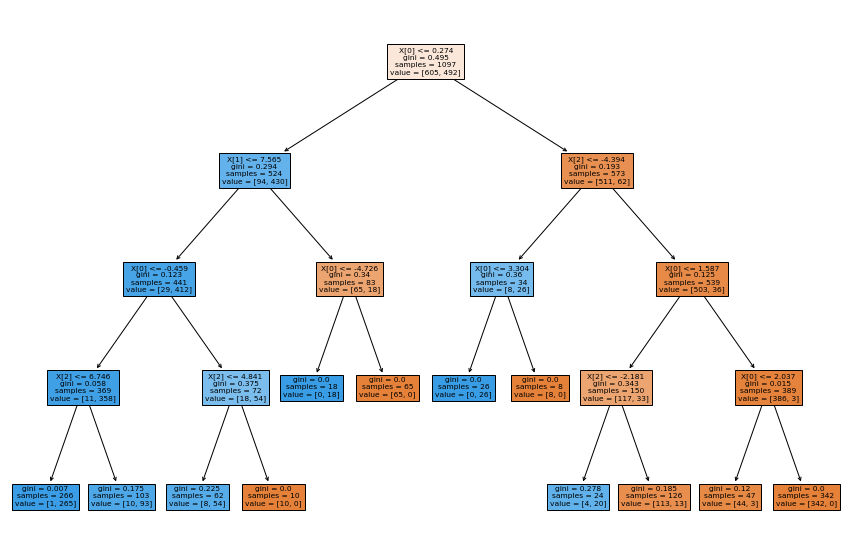

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(classifier_prune, filled=True)